In [1]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotting

## Temperature functions

In [2]:
high_temp = 50
low_temp = 0.01
n_temps = 10000

# temperature functions used
wave_func = lambda x: x+np.exp(-0.001*-x)*np.sin(1*-x)
exponential_even = np.geomspace(high_temp, low_temp, n_temps)
exponential_0003 = np.exp(-np.arange(0, n_temps) * 30 / n_temps) * high_temp
linear = np.linspace(high_temp, low_temp, n_temps)


wavy_lin = linear+np.exp(-0.02*-linear)*np.sin(1*-linear)

Markov chain length of 1.


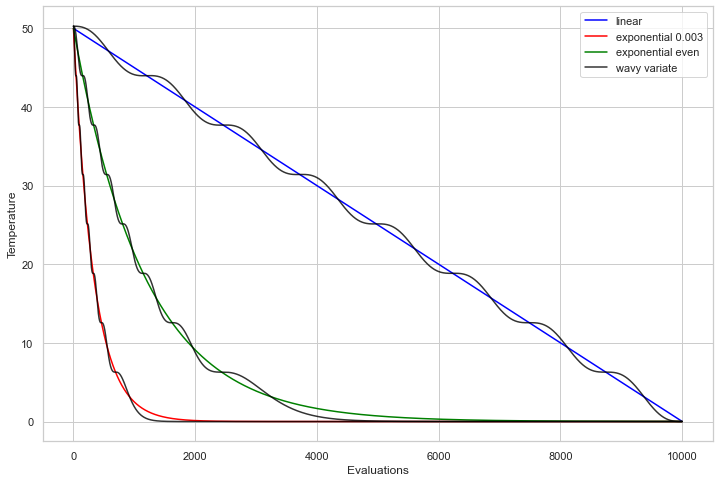

In [3]:
print("Markov chain length of 1.")
sns.set_theme(style="whitegrid")

ax = plt.figure(figsize=(12,8))
offset_x = np.arange(n_temps)-0 # offest of wavy variates

# non wavy
sns.lineplot(linear,label='linear',color='blue',alpha=1)
sns.lineplot(exponential_0003,label='exponential 0.003',color='red',alpha=1)
sns.lineplot(exponential_even,label='exponential even',color='green',alpha=1)

# wavy variates
sns.lineplot(x=offset_x, y=wave_func(linear),color='black',alpha=.8, label='wavy variate')
sns.lineplot(x=offset_x, y=wave_func(exponential_even),color='black',alpha=.8)
sns.lineplot(x=offset_x, y=wave_func(exponential_0003),color='black',alpha=.8)

plt.xlabel("Evaluations")
plt.ylabel("Temperature")
plt.show()

In [3]:
# no force
fname1_nf = 'linear_data_100runs_noforce.csv'
fname2_nf = 'ex_even_data_100runs_noforce.csv'
fname3_nf = 'ex_0003_data_100runs_noforce.csv'

# force
fname1_f = 'linear_data_100runs_force.csv'
fname2_f = 'ex_even_data_100runs_force.csv'
fname3_f = 'ex_0003_data_100runs_force.csv'

names = 'linear', "exponential even spacing", "exponential 0.003"

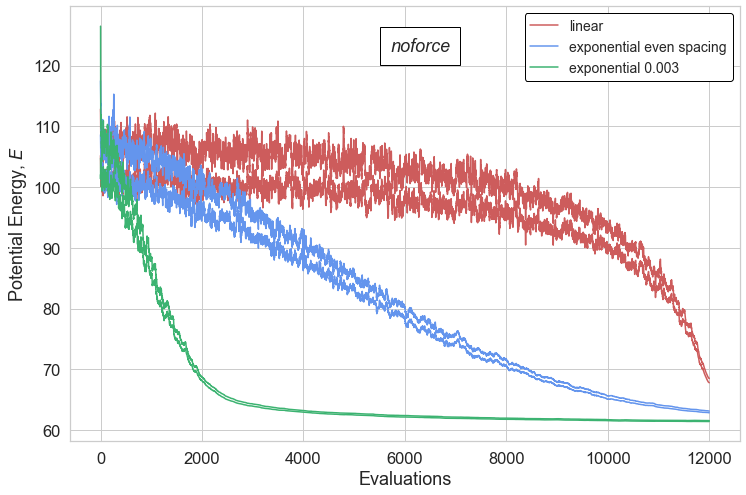

In [5]:
plotting.plot_convergence_compare(fname1_nf, fname2_nf, fname3_nf,'noforce', names)

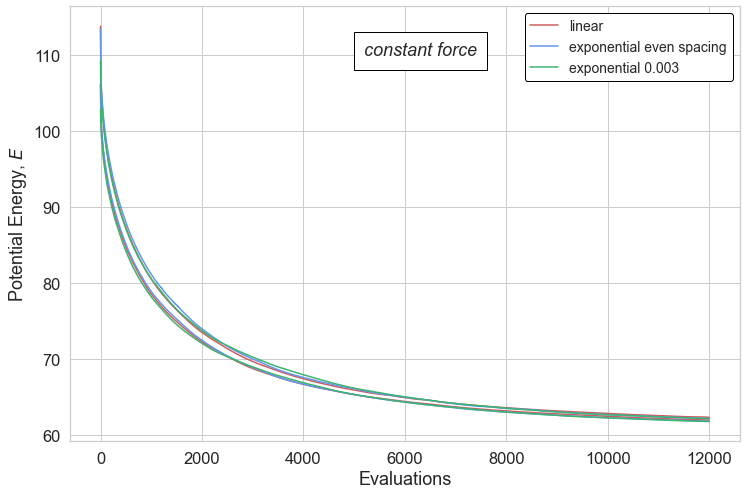

In [6]:
plotting.plot_convergence_compare(fname1_f, fname2_f, fname3_f, 'constant force', names)

# P-value
Plotting p-value results from t-tests over 100 simulations per cooling schedule and force type.

Comparing Cooling schedules


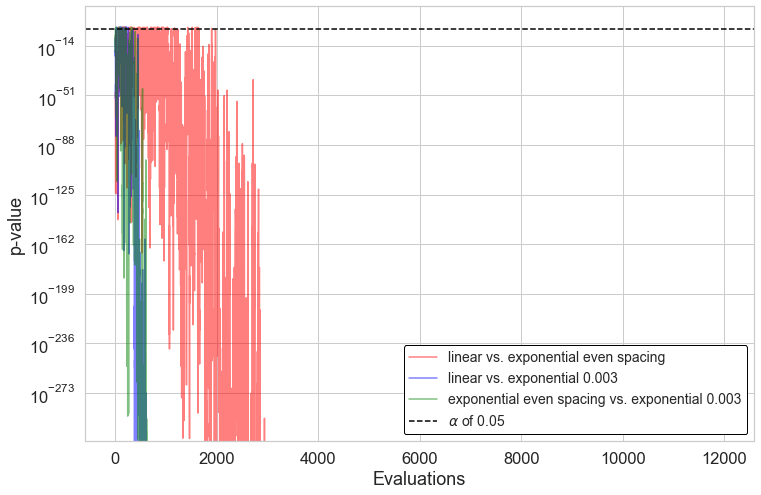

In [4]:
plotting.plot_convergence_pval(fname1_nf, fname2_nf, fname3_nf,
                      names=[(names[0], names[1]), (names[0], names[2]), (names[1], names[2])])
print("Comparing Cooling schedules")